# Chapter 5

Adding white noise channels or all-zeros channels to mnist

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_image, train_labels) , _ = mnist.load_data()

train_image = train_image.reshape((60000,28*28))
train_image = train_image.astype("float32") / 255

train_image_with_noise_channels = np.concatenate([train_image,np.random.random((len(train_image),784))],axis=1)

train_image_with_zeros_channels = np.concatenate([train_image,np.zeros((len(train_image),784))],axis=1)

Train the model

In [5]:
from tensorflow import keras 
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model



Train model with noise channels

In [6]:
model = get_model()

history_noise = model.fit(
    train_image_with_noise_channels,train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6913 - loss: 1.0714 - val_accuracy: 0.9007 - val_loss: 0.3335
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9117 - loss: 0.2827 - val_accuracy: 0.9408 - val_loss: 0.1984
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9441 - loss: 0.1807 - val_accuracy: 0.9422 - val_loss: 0.1943
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9622 - loss: 0.1223 - val_accuracy: 0.9630 - val_loss: 0.1297
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9739 - loss: 0.0859 - val_accuracy: 0.9583 - val_loss: 0.1411
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9784 - loss: 0.0646 - val_accuracy: 0.9654 - val_loss: 0.1198
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9852 - loss: 0.0459 - val_accuracy: 0.9660 - val_loss: 0.1185
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9903 - loss: 0.0334 - val_accuracy: 0.

train model with all-zeros channels

In [7]:


model = get_model()
history_zeros = model.fit(
    train_image_with_zeros_channels,train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8600 - loss: 0.4835 - val_accuracy: 0.9565 - val_loss: 0.1524
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9602 - loss: 0.1343 - val_accuracy: 0.9635 - val_loss: 0.1223
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9752 - loss: 0.0819 - val_accuracy: 0.9727 - val_loss: 0.0925
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9831 - loss: 0.0581 - val_accuracy: 0.9750 - val_loss: 0.0910
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9879 - loss: 0.0426 - val_accuracy: 0.9746 - val_loss: 0.0850
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9915 - loss: 0.0322 - val_accuracy: 0.9798 - val_loss: 0.0739
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9939 - loss: 0.0235 - val_accuracy: 0.9791 - val_loss: 0.0722
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9961 - loss: 0.0161 - val_accuracy: 0.

Plotting the validation accuracy comparison

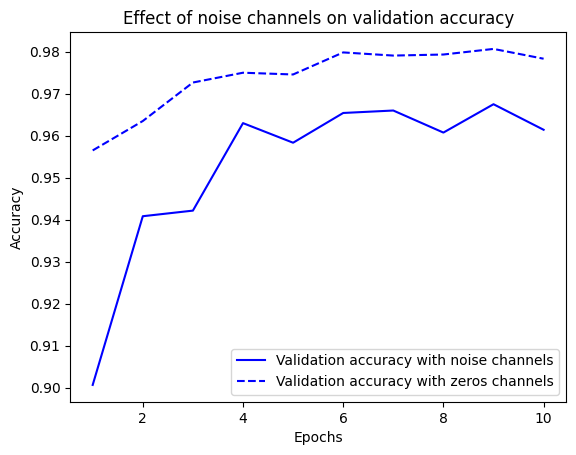

In [9]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1,11)

plt.plot(epochs, val_acc_noise, "b-",label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, "b--",label="Validation accuracy with zeros channels")

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Fitting with randomly shuffled labels

In [10]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

In [11]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images,random_train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1010 - loss: 2.3287 - val_accuracy: 0.1034 - val_loss: 2.3055
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1163 - loss: 2.2976 - val_accuracy: 0.0990 - val_loss: 2.3186
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1283 - loss: 2.2879 - val_accuracy: 0.1012 - val_loss: 2.3176
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1427 - loss: 2.2728 - val_accuracy: 0.1013 - val_loss: 2.3303
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1580 - loss: 2.2557 - val_accuracy: 0.1057 - val_loss: 2.3416
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1733 - loss: 2.2351 - val_accuracy: 0.0953 - val_loss: 2.3602
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1868 - loss: 2.2095 - val_accuracy: 0.0973 - val_loss: 2.3660
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2017 - loss: 2.1832 - val_accuracy: 0.

Training model with an incorrectly high learning rate

In [12]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

model.fit(train_images,train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4006 - loss: 4000.8557 - val_accuracy: 0.2052 - val_loss: 2.2223
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2221 - loss: 2.7488 - val_accuracy: 0.1943 - val_loss: 2.2993
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2124 - loss: 2.5705 - val_accuracy: 0.2387 - val_loss: 2.1046
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1816 - loss: 2.8252 - val_accuracy: 0.1963 - val_loss: 2.3205
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1951 - loss: 2.7748 - val_accuracy: 0.1853 - val_loss: 2.2861
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2011 - loss: 2.2888 - val_accuracy: 0.1943 - val_loss: 2.3112
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1661 - loss: 2.4863 - val_accuracy: 0.1597 - val_loss: 3.0987
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1826 - loss: 2.3346 - val_accuracy:

The same model with a more appropriate learning rate

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
model.fit(train_images, train_labels,
            epochs=10,
            batch_size=128,
            validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8306 - loss: 0.9945 - val_accuracy: 0.9615 - val_loss: 0.1316
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9631 - loss: 0.1247 - val_accuracy: 0.9648 - val_loss: 0.1400
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9738 - loss: 0.0959 - val_accuracy: 0.9668 - val_loss: 0.1451
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9806 - loss: 0.0723 - val_accuracy: 0.9743 - val_loss: 0.1265
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9835 - loss: 0.0641 - val_accuracy: 0.9749 - val_loss: 0.1533
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9857 - loss: 0.0586 - val_accuracy: 0.9711 - val_loss: 0.1709
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9879 - loss: 0.0462 - val_accuracy: 0.9692 - val_loss: 0.2278
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9898 - loss: 0.0416 - val_accuracy: 0.

A simple logistic regression on mnist

In [14]:
model = keras.Sequential([layers.Dense(10,activation="softmax")])

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_small_model = model.fit(train_image,train_labels,
                                epochs=20,
                                batch_size=128,
                                validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7406 - loss: 1.0251 - val_accuracy: 0.9024 - val_loss: 0.3616
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.9000 - loss: 0.3685 - val_accuracy: 0.9133 - val_loss: 0.3112
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.9103 - loss: 0.3231 - val_accuracy: 0.9197 - val_loss: 0.2940
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.9149 - loss: 0.3044 - val_accuracy: 0.9196 - val_loss: 0.2845
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.9201 - loss: 0.2932 - val_accuracy: 0.9228 - val_loss: 0.2786
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.9204 - loss: 0.2845 - val_accuracy: 0.9225 - val_loss: 0.2757
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.9239 - loss: 0.2749 - val_accuracy: 0.9247 - val_loss: 0.2728
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.9241 - loss: 0.2759 - va

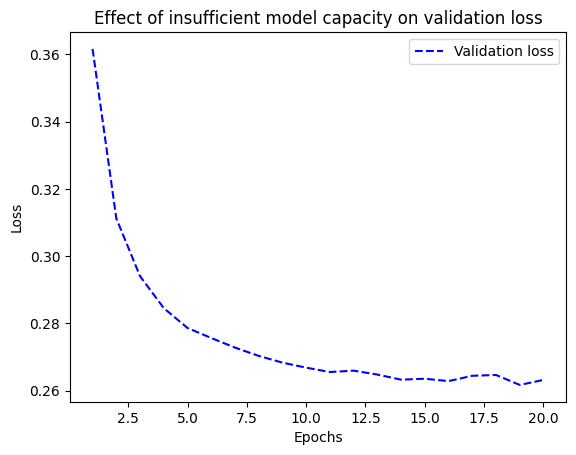

In [15]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Train a bigger model

In [16]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
history_large_model = model.fit(train_images, train_labels,
                                epochs=20,
                                batch_size=128,
                                validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8319 - loss: 0.6263 - val_accuracy: 0.9482 - val_loss: 0.1818
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9501 - loss: 0.1685 - val_accuracy: 0.9597 - val_loss: 0.1360
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9662 - loss: 0.1172 - val_accuracy: 0.9639 - val_loss: 0.1235
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0877 - val_accuracy: 0.9579 - val_loss: 0.1380
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9796 - loss: 0.0661 - val_accuracy: 0.9724 - val_loss: 0.0971
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9823 - loss: 0.0575 - val_accuracy: 0.9726 - val_loss: 0.0937
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9869 - loss: 0.0434 - val_accuracy: 0.9722 - val_loss: 0.0997
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0379 - val_accuracy: 0.

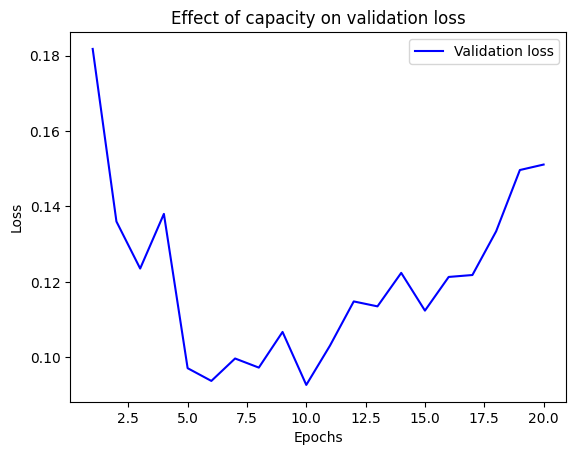

In [17]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Effect of capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Regularizing the model

Original Model

In [18]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), _ = imdb.load_data(num_words=10000)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                    metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                            epochs=20,
                            batch_size=512,
                            validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7158 - loss: 0.5816 - val_accuracy: 0.8730 - val_loss: 0.3767
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8949 - loss: 0.3243 - val_accuracy: 0.8846 - val_loss: 0.3050
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9237 - loss: 0.2379 - val_accuracy: 0.8901 - val_loss: 0.2804
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9453 - loss: 0.1796 - val_accuracy: 0.8777 - val_loss: 0.2968
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9516 - loss: 0.1541 - val_accuracy: 0.8875 - val_loss: 0.2815
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9569 - loss: 0.1356 - val_accuracy: 0.8863 - val_loss: 0.2883
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9678 - loss: 0.1077 - val_accuracy: 0.8829 - val_loss: 0.3095
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9743 - loss: 0.0939 - val_accuracy: 0.8828 - val_loss

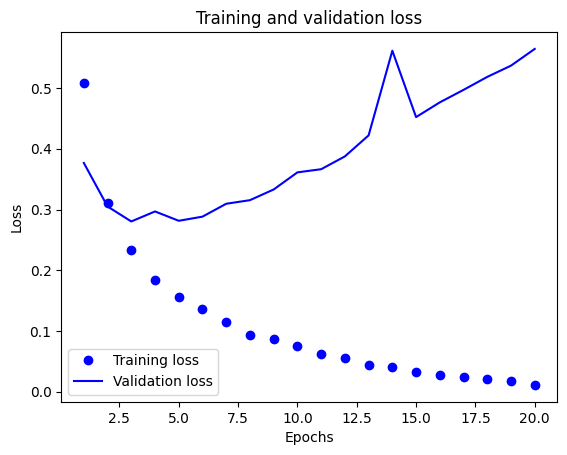

In [21]:
history_dict = history_original.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

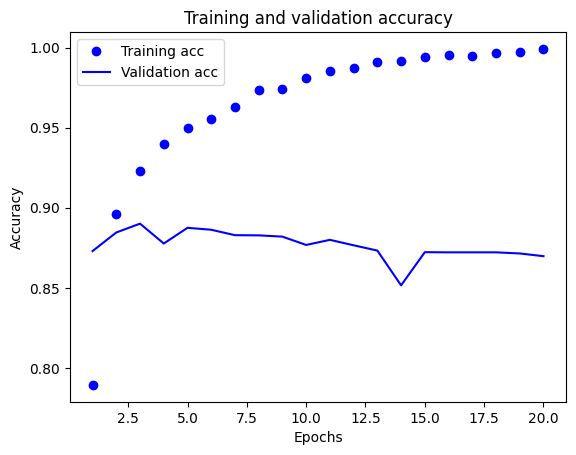

In [22]:
plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Version of the model with lower capacity

In [20]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])
history_smaller_model = model.fit(train_data, train_labels,
                                    epochs=20,
                                    batch_size=512, 
                                    validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6412 - loss: 0.6551 - val_accuracy: 0.7723 - val_loss: 0.5699
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8380 - loss: 0.5387 - val_accuracy: 0.8427 - val_loss: 0.4865
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8810 - loss: 0.4519 - val_accuracy: 0.8738 - val_loss: 0.4189
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9097 - loss: 0.3730 - val_accuracy: 0.8732 - val_loss: 0.3739
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9139 - loss: 0.3207 - val_accuracy: 0.8860 - val_loss: 0.3372
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9253 - loss: 0.2752 - val_accuracy: 0.8884 - val_loss: 0.3144
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9354 - loss: 0.2404 - val_accuracy: 0.8898 - val_loss: 0.2952
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9387 - loss: 0.2174 - val_accuracy: 0.8889 - val_loss

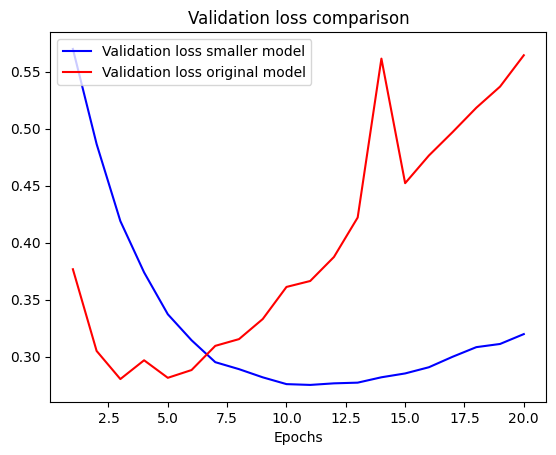

In [23]:
history_dict = history_smaller_model.history
history_org = history_original.history
loss = history_dict["loss"]
lost_org = history_org["loss"]
val_loss = history_dict["val_loss"]
val_loss_org = history_org["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b", label="Validation loss smaller model")
plt.plot(epochs, val_loss_org, "r", label="Validation loss original model")
plt.title("Validation loss comparison")
plt.xlabel("Epochs")
plt.legend()
plt.show()

Version of the model with higher capacity

In [24]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])
history_larger_model = model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.7002 - loss: 0.6861 - val_accuracy: 0.8352 - val_loss: 0.3808
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8670 - loss: 0.3165 - val_accuracy: 0.8700 - val_loss: 0.3196
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9211 - loss: 0.2106 - val_accuracy: 0.8733 - val_loss: 0.3087
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9319 - loss: 0.1732 - val_accuracy: 0.8685 - val_loss: 0.3442
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9471 - loss: 0.1413 - val_accuracy: 0.8830 - val_loss: 0.3151
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9600 - loss: 0.1242 - val_accuracy: 0.8882 - val_loss: 0.3265
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9817 - loss: 0.0718 - val_accuracy: 0.8796 - val_loss: 0.3492
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9909 - loss: 0.0384 - val_accuracy: 0.8857 - v

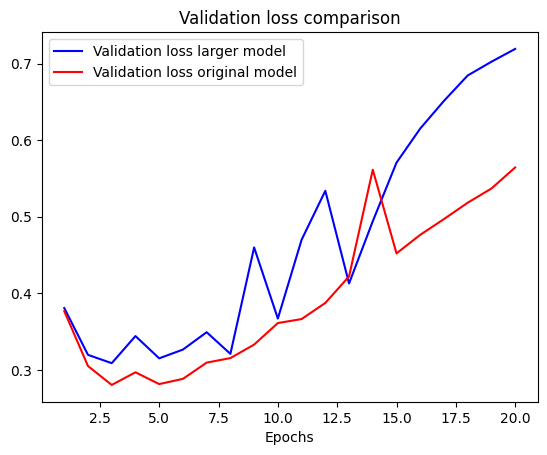

In [25]:
history_dict = history_larger_model.history
history_org = history_original.history
loss = history_dict["loss"]
lost_org = history_org["loss"]
val_loss = history_dict["val_loss"]
val_loss_org = history_org["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b", label="Validation loss larger model")
plt.plot(epochs, val_loss_org, "r", label="Validation loss original model")
plt.title("Validation loss comparison")
plt.xlabel("Epochs")
plt.legend()
plt.show()

Adding L2 weight regularization to the model

In [26]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])

history_l2_reg = model.fit(train_data,train_labels,
                           epochs=20,
                            batch_size=512,
                            validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6748 - loss: 0.6984 - val_accuracy: 0.8684 - val_loss: 0.4892
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8868 - loss: 0.4449 - val_accuracy: 0.8838 - val_loss: 0.4059
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9120 - loss: 0.3541 - val_accuracy: 0.8882 - val_loss: 0.3704
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9282 - loss: 0.3062 - val_accuracy: 0.8889 - val_loss: 0.3584
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9322 - loss: 0.2822 - val_accuracy: 0.8857 - val_loss: 0.3604
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9400 - loss: 0.2618 - val_accuracy: 0.8839 - val_loss: 0.3673
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9467 - loss: 0.2471 - val_accuracy: 0.8849 - val_loss: 0.3600
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9494 - loss: 0.2391 - val_accuracy: 0.8788 - val_los

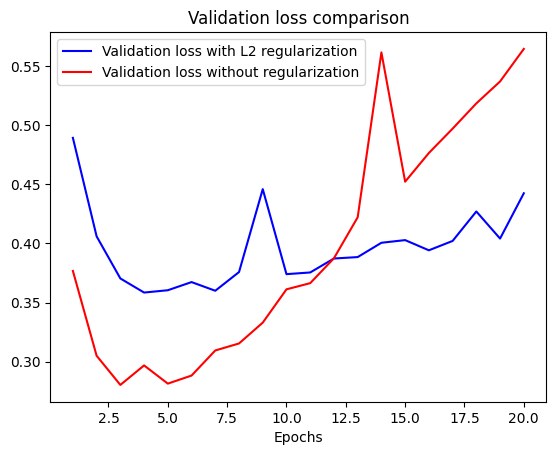

In [28]:
history_dict = history_l2_reg.history
history_org = history_original.history
val_loss = history_dict["val_loss"]
val_loss_org = history_org["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b", label="Validation loss with L2 regularization")
plt.plot(epochs, val_loss_org, "r", label="Validation loss without regularization")
plt.title("Validation loss comparison")
plt.xlabel("Epochs")
plt.legend()
plt.show()

Adding dropout to the IMDB model

In [29]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout = model.fit(train_data,train_labels,
                            epochs=20,
                            batch_size=512,
                            validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5899 - loss: 0.6615 - val_accuracy: 0.8494 - val_loss: 0.5171
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7614 - loss: 0.5289 - val_accuracy: 0.8731 - val_loss: 0.4031
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8164 - loss: 0.4431 - val_accuracy: 0.8808 - val_loss: 0.3454
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8521 - loss: 0.3817 - val_accuracy: 0.8870 - val_loss: 0.3068
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8801 - loss: 0.3350 - val_accuracy: 0.8882 - val_loss: 0.2938
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8989 - loss: 0.2917 - val_accuracy: 0.8913 - val_loss: 0.2799
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9124 - loss: 0.2590 - val_accuracy: 0.8901 - val_loss: 0.2786
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9207 - loss: 0.2399 - val_accuracy: 0.8928 - val_loss

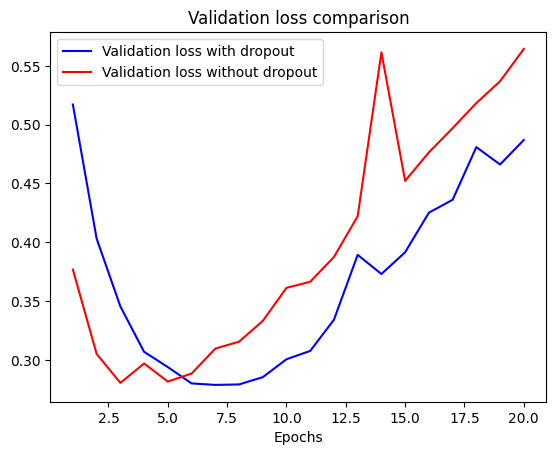

In [30]:
history_dict = history_dropout.history
history_org = history_original.history

val_loss = history_dict["val_loss"]
val_loss_org = history_org["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b", label="Validation loss with dropout")
plt.plot(epochs, val_loss_org, "r", label="Validation loss without dropout")
plt.title("Validation loss comparison")
plt.xlabel("Epochs")
plt.legend()
plt.show()